In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
b=pd.read_csv('/content/drive/MyDrive/AMA/bakery.csv')
b.head()

,daywk,weekday,Date,Cakes,Pies,Cookies,Smoothies,Coffee,promotion
0,Tuesday,2,01-01-2013,79,46,518,60,233,none
1,Wednesday,3,02-01-2013,91,50,539,161,427,none
2,Thursday,4,03-01-2013,47,60,222,166,347,none
3,Friday,5,04-01-2013,89,64,734,153,358,none
4,Saturday,6,05-01-2013,112,73,764,240,392,none


In [ ]:
b.isnull().sum()

,0
daywk,0
weekday,0
Date,0
Cakes,0
Pies,0
Cookies,0
Smoothies,0
Coffee,0
promotion,0


In [ ]:
b.nunique()

,0
daywk,7
weekday,7
Date,1095
Cakes,112
Pies,74
Cookies,460
Smoothies,302
Coffee,386
promotion,2


In [ ]:

def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

items = ['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee']
for item in items:
    outliers = find_outliers_iqr(b[item])
    print(f"Outliers for {item}:\n{outliers}\n")

Outliers for Cakes:
124     140
165     136
207     136
215      32
326     141
494     150
537     139
607     137
627     142
711     143
718     140
781     146
843     137
864     138
872     165
900     136
970     144
971     147
993     153
1004    138
1013    141
1074    156
1082    148
1090    136
Name: Cakes, dtype: int64

Outliers for Pies:
25      16
123     98
227     94
277     91
291     98
529     95
584     90
620     95
711     93
1011    91
Name: Pies, dtype: int64

Outliers for Cookies:
5        922
529      896
551     1152
655      941
858      917
963      913
998      977
1005     966
1034     981
1074     907
Name: Cookies, dtype: int64

Outliers for Smoothies:
157    423
185    437
199    411
207    511
228    439
236    426
487    449
521    440
551    420
564    407
578    465
579    412
584    468
592    460
600    551
879    419
886    434
920    421
921    477
936    514
942    417
948    416
969    441
Name: Smoothies, dtype: int64

Outliers for Coffee:


In [ ]:
# prompt: replace outliers with KNN model with 5 as neighbour

from sklearn.impute import KNNImputer

# Assuming 'b' DataFrame is already loaded as in the previous code

def replace_outliers_knn(data, n_neighbors=10):
    """Replaces outliers with KNN imputation."""
    imputer = KNNImputer(n_neighbors=n_neighbors)
    data_imputed = imputer.fit_transform(data)
    return pd.DataFrame(data_imputed, columns=data.columns)


items = ['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee']
for item in items:
    # Identify outliers (using the existing function)
    outliers = find_outliers_iqr(b[item])

    # Create a copy of the relevant column to avoid modifying the original DataFrame
    temp_data = b[[item]].copy()

    # Replace outliers with NaN for KNN imputation to work
    temp_data.loc[outliers.index, item] = np.nan

    # Use KNN imputation to fill NaN values
    imputed_data = replace_outliers_knn(temp_data)

    # Update original dataframe with imputed values
    b[item] = imputed_data[item]

    print(f"Outliers for {item} replaced with KNN imputation.")

# Now 'b' DataFrame has outliers replaced with KNN imputed values.

Outliers for Cakes replaced with KNN imputation.
Outliers for Pies replaced with KNN imputation.
Outliers for Cookies replaced with KNN imputation.
Outliers for Smoothies replaced with KNN imputation.
Outliers for Coffee replaced with KNN imputation.


In [ ]:
# Outliers are replaced with the KNN values

In [ ]:
b[5:10]

,daywk,weekday,Date,Cakes,Pies,Cookies,Smoothies,Coffee,promotion,month,year
5,Sunday,7,2013-01-06,89.0,57.0,536.610138,259.0,510.0,none,1,2013
6,Monday,1,2013-01-07,70.0,50.0,476.000000,120.0,334.0,none,1,2013
7,Tuesday,2,2013-01-08,70.0,48.0,496.000000,222.0,316.0,none,1,2013
8,Wednesday,3,2013-01-09,59.0,37.0,587.000000,181.0,156.0,none,1,2013
9,Thursday,4,2013-01-10,71.0,36.0,488.000000,178.0,298.0,none,1,2013


In [ ]:
b.head()

,daywk,weekday,Date,Cakes,Pies,Cookies,Smoothies,Coffee,promotion,month,year
0,Tuesday,2,2013-01-01,79.0,46.0,518.0,60.0,233.0,none,1,2013
1,Wednesday,3,2013-01-02,91.0,50.0,539.0,161.0,427.0,none,1,2013
2,Thursday,4,2013-01-03,47.0,60.0,222.0,166.0,347.0,none,1,2013
3,Friday,5,2013-01-04,89.0,64.0,734.0,153.0,358.0,none,1,2013
4,Saturday,6,2013-01-05,112.0,73.0,764.0,240.0,392.0,none,1,2013


In [ ]:
pivot_table = pd.pivot_table(b, values=['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee'],
                             index=['daywk'],
                             aggfunc='sum')

# Display the pivot table
print(pivot_table)

                  Cakes        Coffee       Cookies         Pies     Smoothies
daywk                                                                         
Friday     14541.451914  65975.782288  92814.610138  9195.743779  34912.679104
Monday     12191.112979  54915.891144  75207.000000  7518.000000  30477.000000
Saturday   15376.400960  70380.887736  99395.951599  9923.735484  38262.968120
Sunday     14777.790850  67784.000000  91202.830415  9277.000000  36228.924440
Thursday   12148.000000  57259.891144  76722.000000  7553.000000  30956.000000
Tuesday    12079.000000  54693.000000  75458.000000  7342.000000  31176.000000
Wednesday  11986.000000  54562.000000  76438.000000  7497.000000  31119.000000


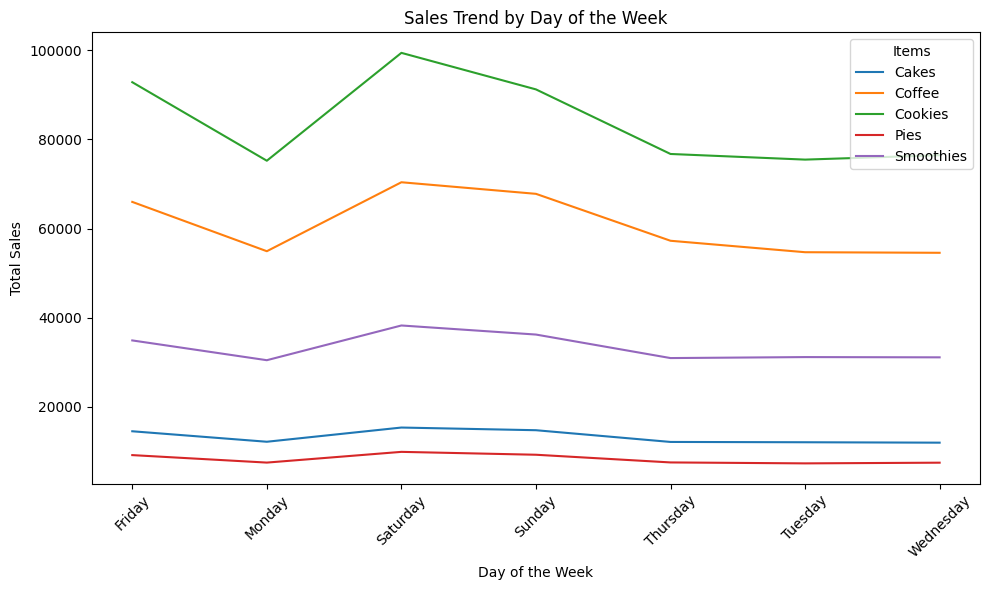

In [ ]:
# prompt: line chart for above data

import matplotlib.pyplot as plt

# Assuming 'pivot_table' is already created as in your provided code

# Plotting the line chart
pivot_table.plot(kind='line', figsize=(10, 6))
plt.title('Sales Trend by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Items') # Add a legend
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# prompt: separate column for average sales of all items for weekend and weekday

# Assuming your pivot_table index contains days of the week (e.g., 'Monday', 'Tuesday')
# and you want to separate Weekday (Monday-Friday) and Weekend (Saturday-Sunday)

# Define weekdays and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']  # Adjust if needed
weekends = ['Saturday', 'Sunday']  # Adjust if needed

# Calculate the average sales for each item on weekdays and weekends
weekday_avg = pivot_table.loc[weekdays, :].mean(axis=0)
weekend_avg = pivot_table.loc[weekends, :].mean(axis=0)

# Create a new DataFrame to store the average sales
average_sales = pd.DataFrame({
    'Item': weekday_avg.index,
    'Weekday Average Sales': weekday_avg.values,
    'Weekend Average Sales': weekend_avg.values
})

# Display the average sales DataFrame
average_sales

,Item,Weekday Average Sales,Weekend Average Sales
0,Cakes,12589.112979,15077.095905
1,Coffee,57481.312915,69082.443868
2,Cookies,79327.922028,95299.391007
3,Pies,7821.148756,9600.367742
4,Smoothies,31728.135821,37335.993051


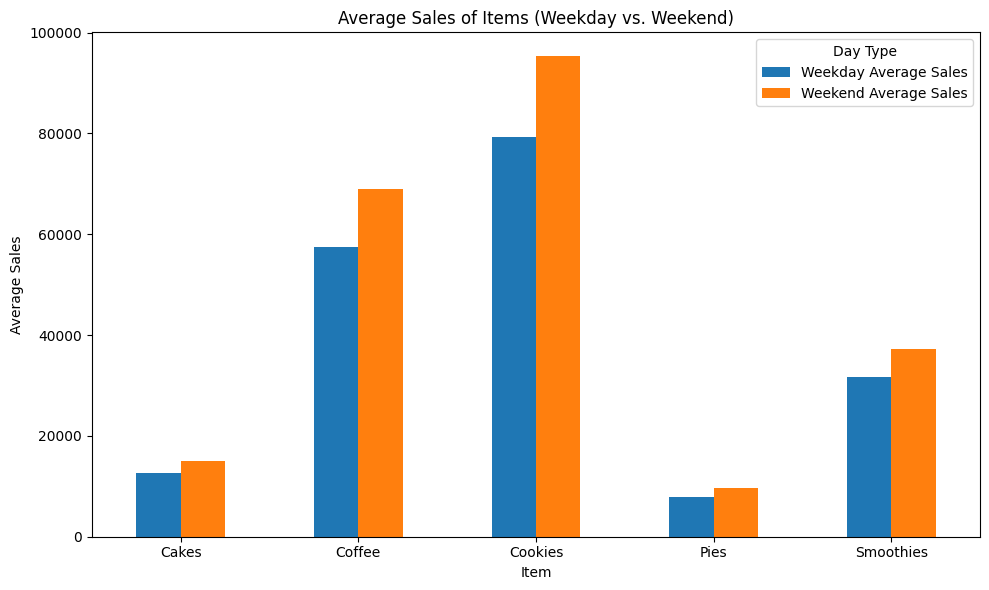

In [ ]:
# prompt: chart for average sales pf each items and weekend, weekday separately

# Assuming 'average_sales' DataFrame is already created as in your provided code

# Plotting the bar chart
average_sales.plot(x='Item', y=['Weekday Average Sales', 'Weekend Average Sales'], kind='bar', figsize=(10, 6))
plt.title('Average Sales of Items (Weekday vs. Weekend)')
plt.xlabel('Item')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Day Type') # Add a legend
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# prompt: convert date into month and year

# Assuming 'b' DataFrame is already loaded and processed as in your provided code

# Convert 'date' column to datetime objects if it's not already
# The error is due to incorrect date format, specify the correct format 'dd-mm-YYYY'
b['Date'] = pd.to_datetime(b['Date'], format='%d-%m-%Y')

# Extract month and year
b['month'] = b['Date'].dt.month
b['year'] = b['Date'].dt.year

# Now you have 'month' and 'year' columns in your 'b' DataFrame
print(b[['Date', 'month', 'year']].head())

        Date  month  year
0 2013-01-01      1  2013
1 2013-01-02      1  2013
2 2013-01-03      1  2013
3 2013-01-04      1  2013
4 2013-01-05      1  2013


In [ ]:
b.tail()

,daywk,weekday,Date,Cakes,Pies,Cookies,Smoothies,Coffee,promotion,month,year
1090,Sunday,7,2015-12-27,85.112979,49.0,700.0,265.0,483.0,none,12,2015
1091,Monday,1,2015-12-28,77.000000,45.0,605.0,69.0,408.0,none,12,2015
1092,Tuesday,2,2015-12-29,93.000000,56.0,508.0,185.0,452.0,none,12,2015
1093,Wednesday,3,2015-12-30,62.000000,28.0,458.0,141.0,356.0,none,12,2015
1094,Thursday,4,2015-12-31,65.000000,56.0,491.0,190.0,446.0,none,12,2015


In [ ]:
pivot_table = pd.pivot_table(b, values=['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee'],
                             index=['month'],
                             aggfunc='sum')

# Display the pivot table
print(pivot_table)

             Cakes        Coffee       Cookies         Pies     Smoothies
month                                                                    
1      7726.000000  36708.891144  47684.610138  4840.247926  15955.000000
2      7028.112979  33190.891144  44886.000000  4507.000000  14692.000000
3      7848.000000  36317.000000  50764.000000  4999.000000  16930.000000
4      7549.112979  34550.000000  46740.000000  4647.000000  19016.000000
5      8107.451914  34673.891144  49484.610138  4801.247926  21801.240703
6      7604.338936  34938.000000  46938.610138  4906.247926  24127.825591
7      8034.112979  36307.782288  49612.610138  4881.000000  24764.679104
8      7778.451914  37519.649728  49947.900907  5052.495853  24364.848881
9      7717.225957  34081.000000  49164.610138  4670.247926  19737.000000
10     7833.271175  35626.673432  50693.220276  4996.743779  19629.070927
11     7989.112979  34691.673432  51172.610138  4955.000000  15463.000000
12     7884.564893  36966.000000  5014

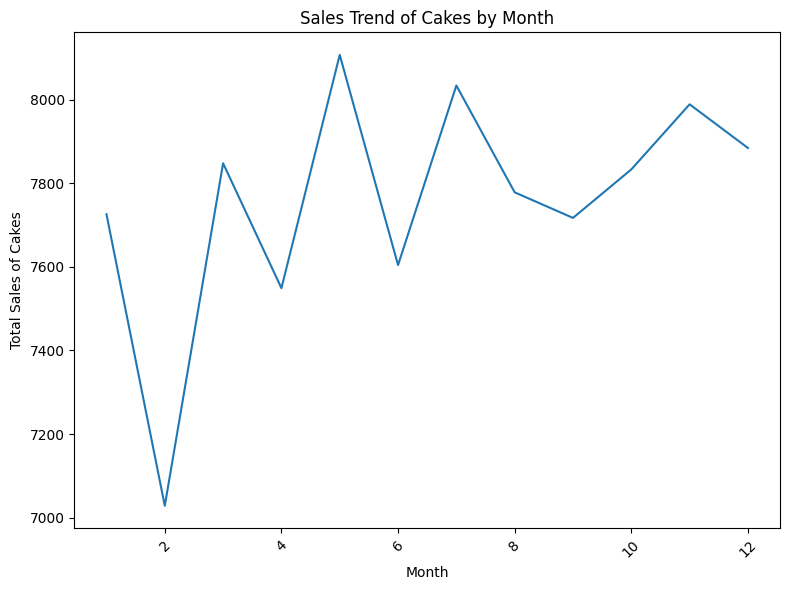

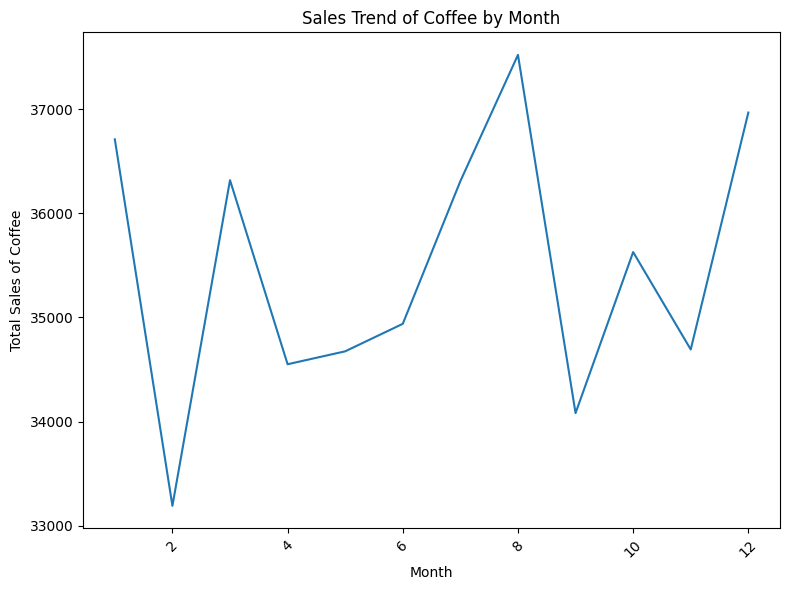

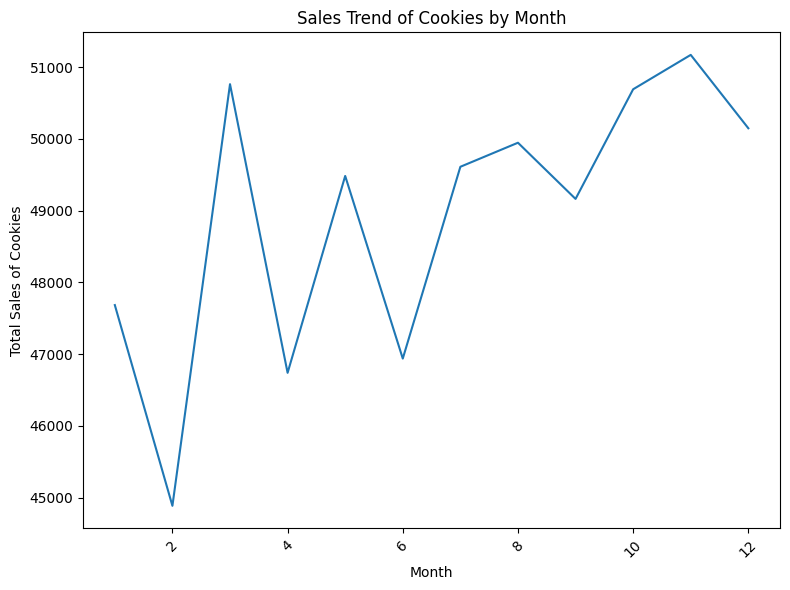

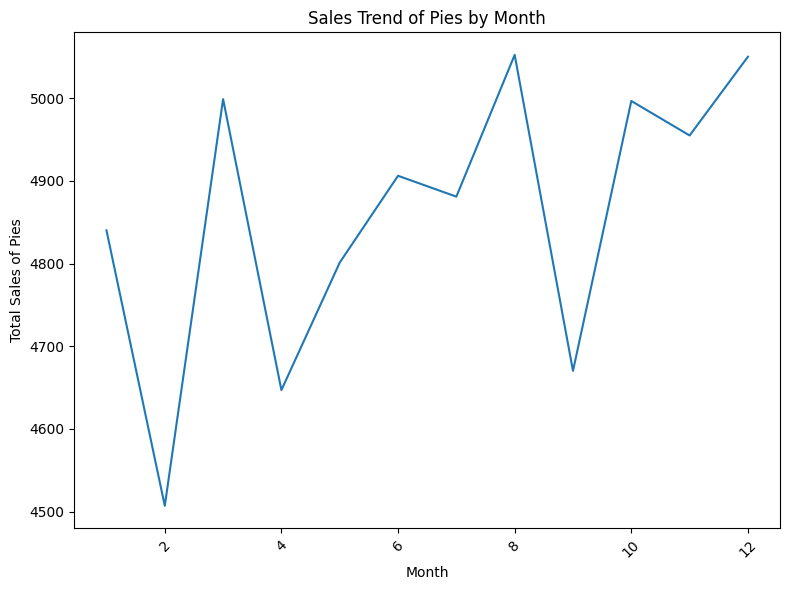

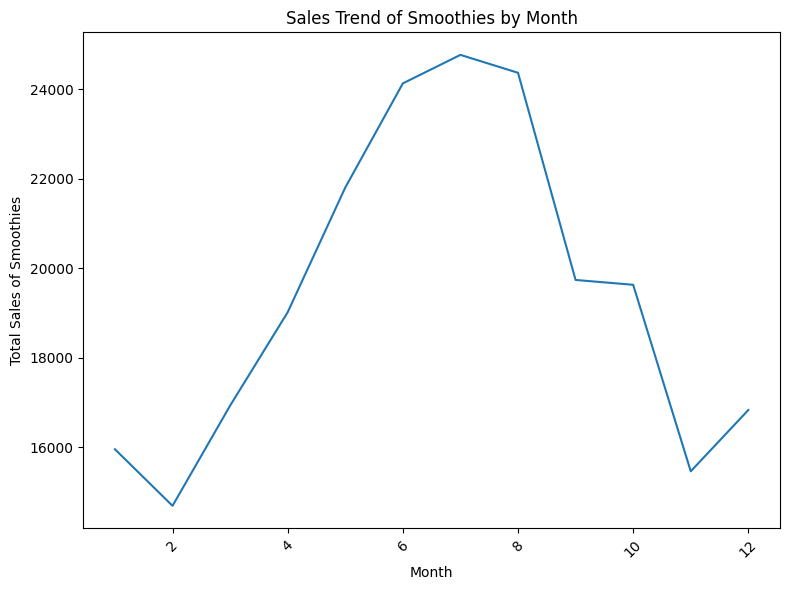

In [ ]:
# prompt: chart for above data for each item separately

# Assuming 'pivot_table' is already created as in your provided code

# Plotting separate line charts for each item
for item in pivot_table.columns:
    plt.figure(figsize=(8, 6))  # Create a new figure for each item
    plt.plot(pivot_table.index, pivot_table[item])
    plt.title(f'Sales Trend of {item} by Month')
    plt.xlabel('Month')
    plt.ylabel(f'Total Sales of {item}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
pivot_table = pd.pivot_table(b, values=['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee'],
                             index=['promotion'],
                             aggfunc='mean')

# Display the pivot table
print(pivot_table)

               Cakes      Coffee     Cookies       Pies   Smoothies
promotion                                                          
none       84.198835  384.881215  529.010103  52.667500  210.779936
promotion  92.399126  422.395052  601.485823  58.445379  231.948499


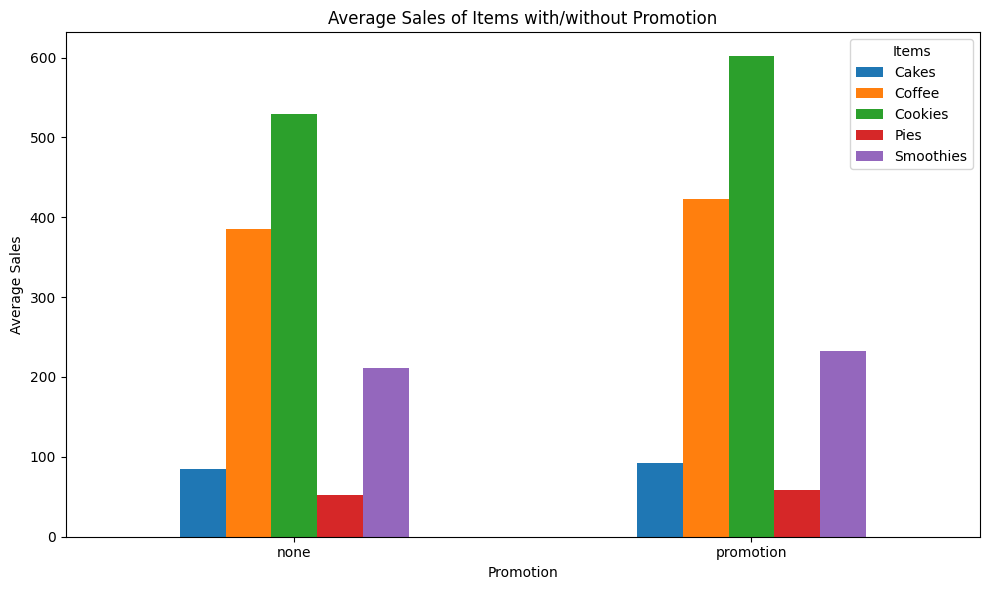

In [ ]:
# prompt: chart for this

# Assuming 'pivot_table' is already created as in your provided code

# Plotting the bar chart
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sales of Items with/without Promotion')
plt.xlabel('Promotion')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Items') # Add a legend
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
pivot_table_cakes = pd.pivot_table(b, values='Cakes', index='weekday', columns='promotion', aggfunc='mean')
print("Impact of promotions on cakes sales:")
print(pivot_table_cakes)

Impact of promotions on cakes sales:
promotion       none   promotion
weekday                         
1          76.045113   90.309260
2          76.139860   85.071429
3          75.021429   87.235294
4          76.569444   86.307692
5          93.232349   93.017381
6          98.196824  102.317994
7          93.776271  103.069561


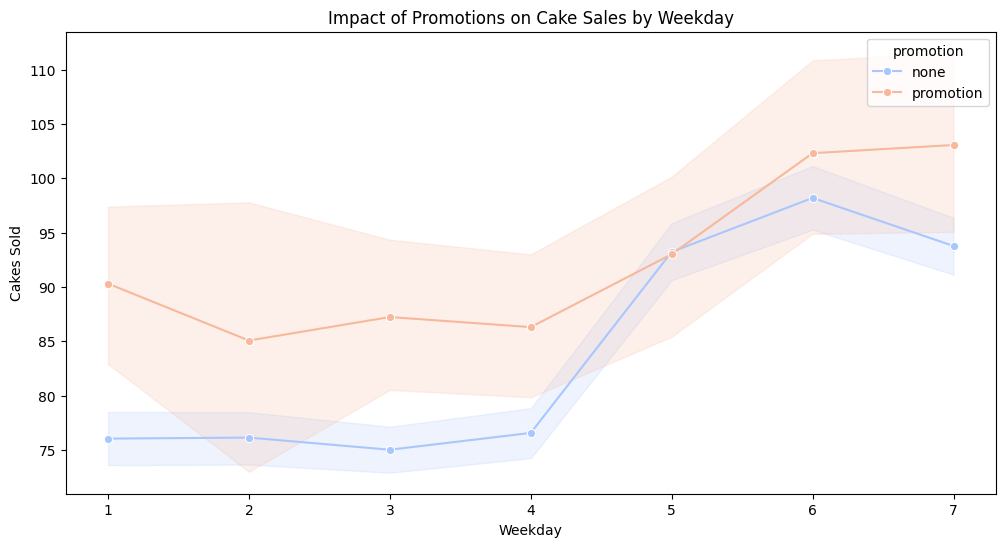

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='weekday', y='Cakes', hue='promotion', data=b, marker='o', palette='coolwarm')
plt.title('Impact of Promotions on Cake Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Cakes Sold')
plt.show()

In [ ]:
# promotional activities is effective on monday and it has a negative impact on friday(sales seems to be more in number when not engaged in promotions)

In [ ]:
pivot_table_coffee = pd.pivot_table(b, values='Coffee', index='weekday', columns='promotion', aggfunc='mean')
print("Impact of promotions on coffee sales:")
print(pivot_table_coffee)

Impact of promotions on coffee sales:
promotion        none   promotion
weekday                          
1          340.593166  418.130435
2          346.013986  372.357143
3          343.264286  382.647059
4          362.902022  384.769231
5          421.811189  435.137099
6          448.649397  476.619531
7          428.478571  487.312500


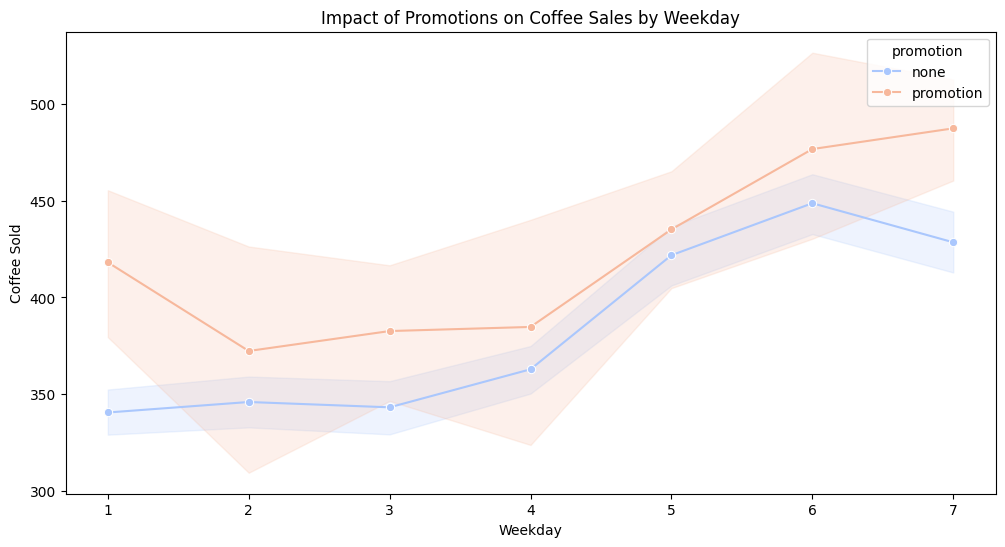

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='weekday', y='Coffee', hue='promotion', data=b, marker='o', palette='coolwarm')
plt.title('Impact of Promotions on Coffee Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Coffee Sold')
plt.show()

In [ ]:
# promotion seems to be doing good during monday and seems ineffective during friday

In [ ]:
pivot_table_pies = pd.pivot_table(b, values='Pies', index='weekday', columns='promotion', aggfunc='mean')
print("Impact of promotions on pies sales:")
print(pivot_table_pies
)

Impact of promotions on pies sales:
promotion       none  promotion
weekday                        
1          47.308271  53.304348
2          46.335664  51.142857
3          47.064286  53.411765
4          47.347222  56.538462
5          58.791944  60.653527
6          62.889011  70.963989
7          58.678571  66.375000


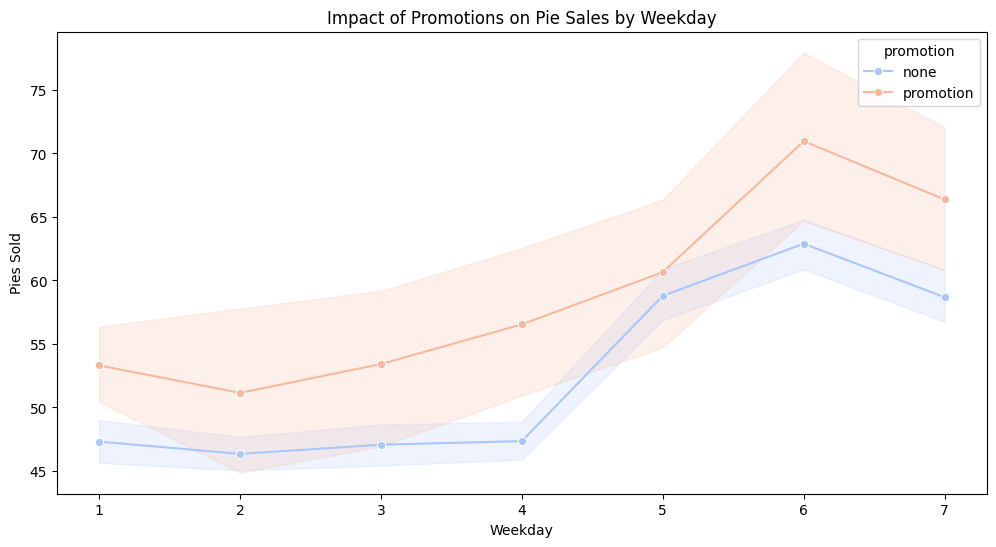

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='weekday', y='Pies', hue='promotion', data=b, marker='o', palette='coolwarm')
plt.title('Impact of Promotions on Pie Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Pies Sold')
plt.show()

In [ ]:
# on thursdays,promotional activities seems to be effective
# on fridays, it is ineffective

In [ ]:
pivot_table_smoothies = pd.pivot_table(b, values='Smoothies', index='weekday', columns='promotion', aggfunc='mean')
print("Impact of promotions on smoothies sales:")
print(pivot_table_smoothies)

Impact of promotions on smoothies sales:
promotion        none   promotion
weekday                          
1          194.413534  200.869565
2          194.839161  236.714286
3          195.750000  218.470588
4          194.159722  230.538462
5          221.359018  250.641504
6          243.282694  265.487542
7          230.962533  243.385611


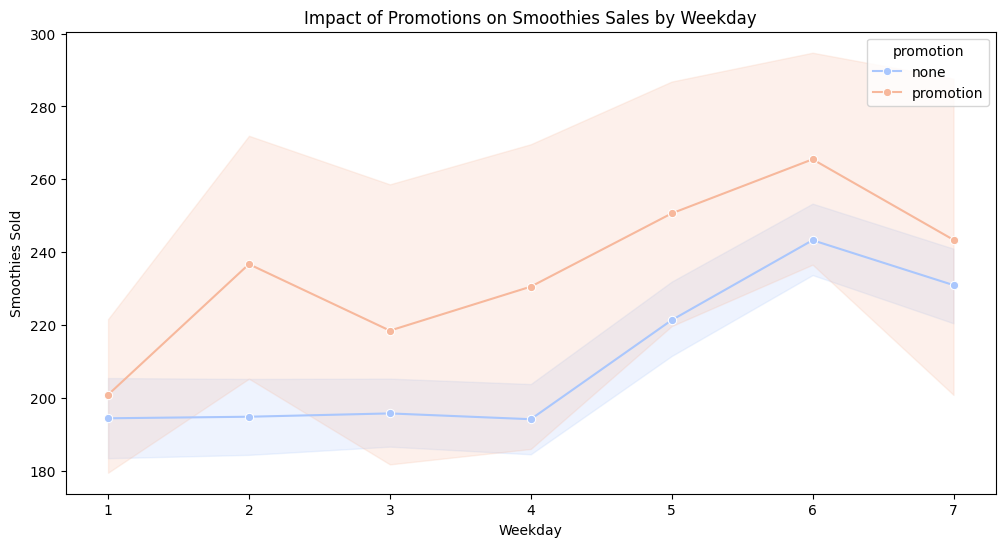

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='weekday', y='Smoothies', hue='promotion', data=b, marker='o', palette='coolwarm')
plt.title('Impact of Promotions on Smoothies Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Smoothies Sold')
plt.show()

In [ ]:
#promotions is effective on tuesdays and ineefective on sundays

In [ ]:
pivot_table_cookies = pd.pivot_table(b, values='Cookies', index='weekday', columns='promotion', aggfunc='mean')
print("Impact of promotions on Cookies sales:")
print(pivot_table_cookies)

Impact of promotions on Cookies sales:
promotion        none   promotion
weekday                          
1          469.015038  557.739130
2          469.944056  589.714286
3          476.978571  568.294118
4          478.250000  604.153846
5          589.839161  651.354626
6          633.953109  669.615010
7          582.004358  607.638767


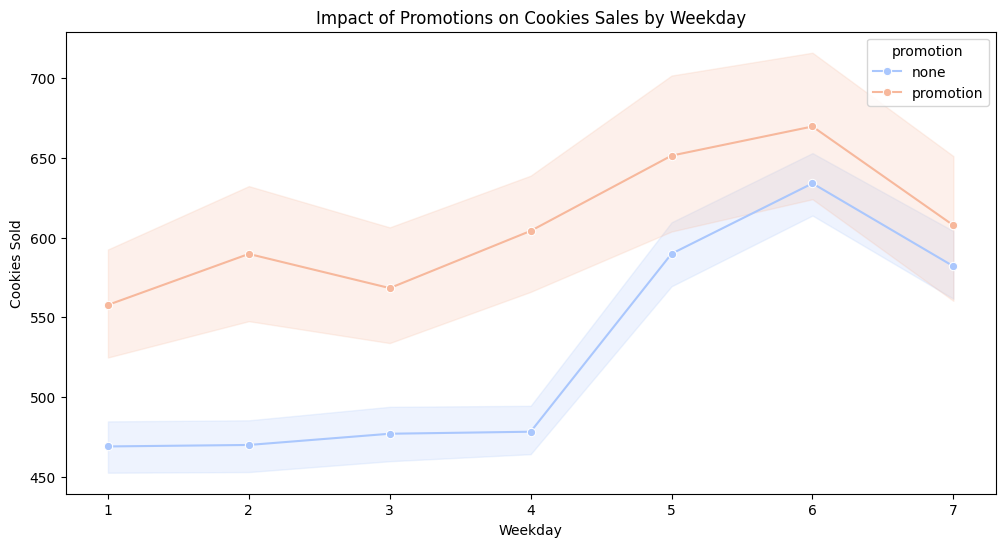

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='weekday', y='Cookies', hue='promotion', data=b, marker='o', palette='coolwarm')
plt.title('Impact of Promotions on Cookies Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Cookies Sold')
plt.show()

In [ ]:
#promotions is effective on thursdays and ineefective on sundays

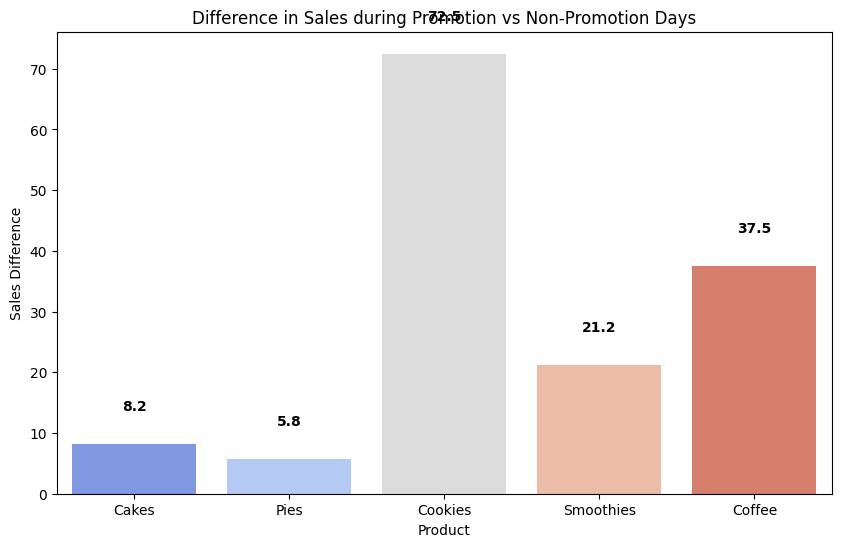

In [ ]:
mean_sales = b.groupby('promotion')[['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee']].mean()

# Calculate the difference in sales between promotion and non-promotion days
sales_diff = mean_sales.loc['promotion'] - mean_sales.loc['none']

# Plot the difference in sales
plt.figure(figsize=(10,6))
sns.barplot(x=sales_diff.index, y=sales_diff.values, palette='coolwarm')

# Highlight the differences
for i, value in enumerate(sales_diff.values):
    plt.text(i, value + 5, f"{value:.1f}", ha='center', va='bottom', fontweight='bold')

plt.title('Difference in Sales during Promotion vs Non-Promotion Days')
plt.ylabel('Sales Difference')
plt.xlabel('Product')
plt.show()

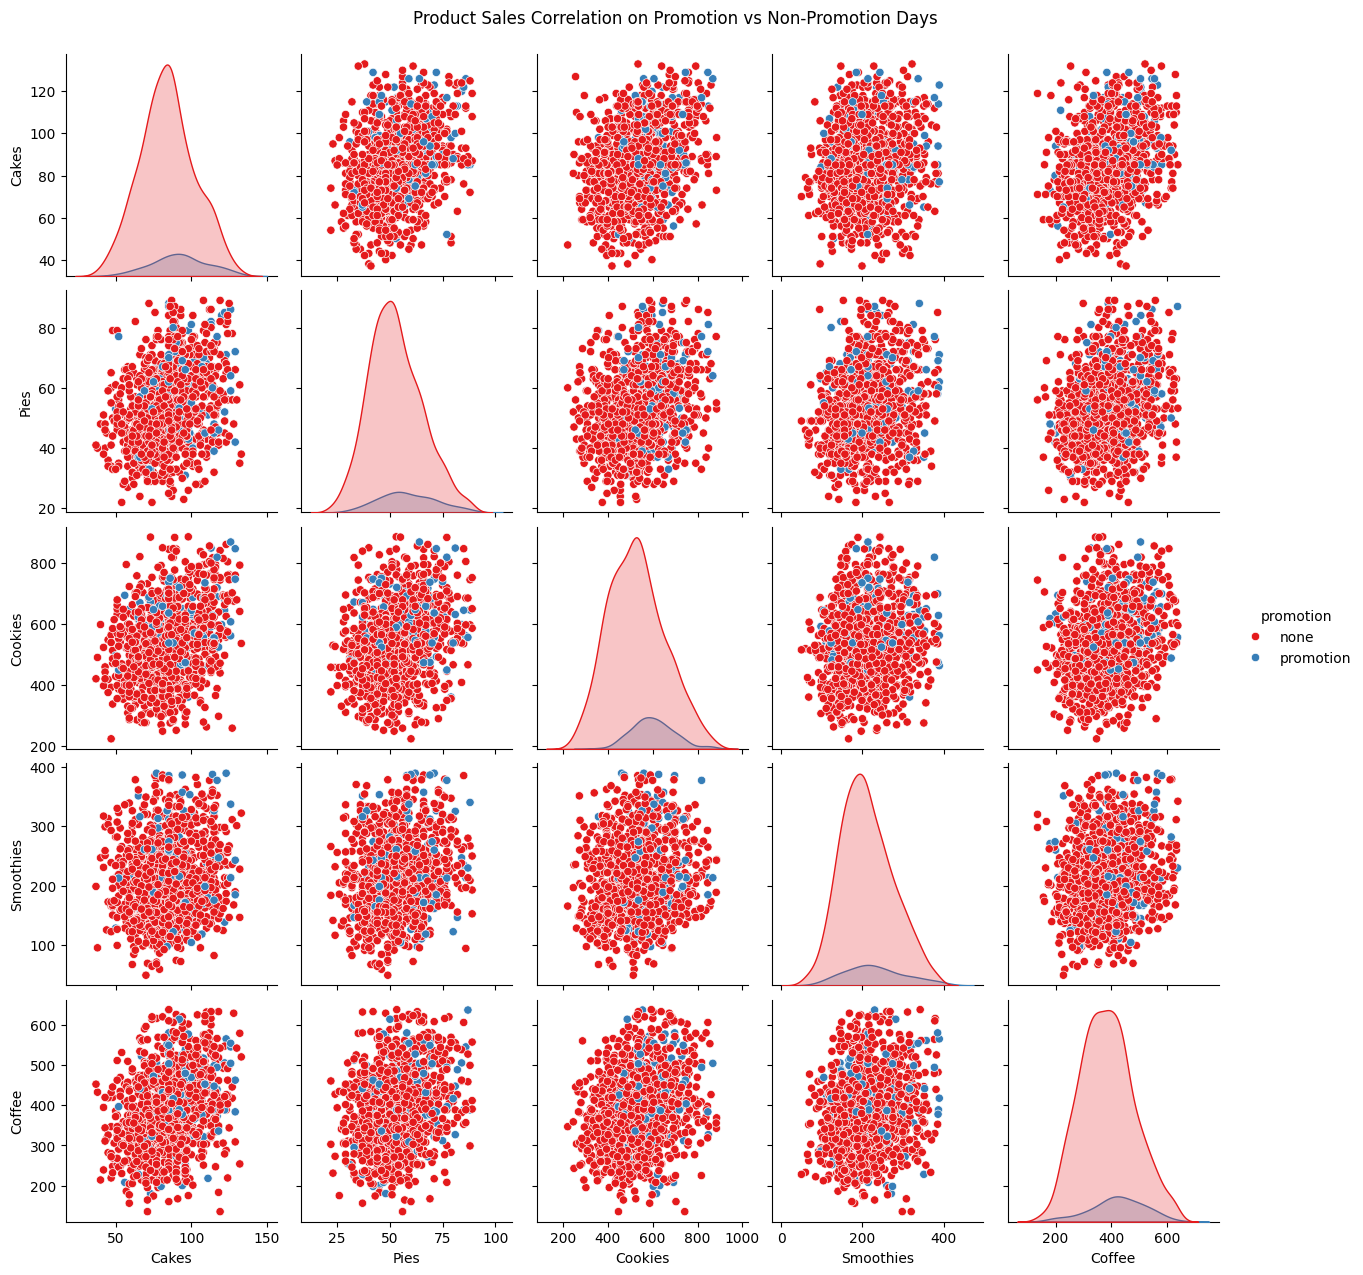

In [ ]:
sns.pairplot([['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee', 'promotion']], hue='promotion', palette='Set1')
plt.suptitle('Product Sales Correlation on Promotion vs Non-Promotion Days', y=1.02)
plt.show()

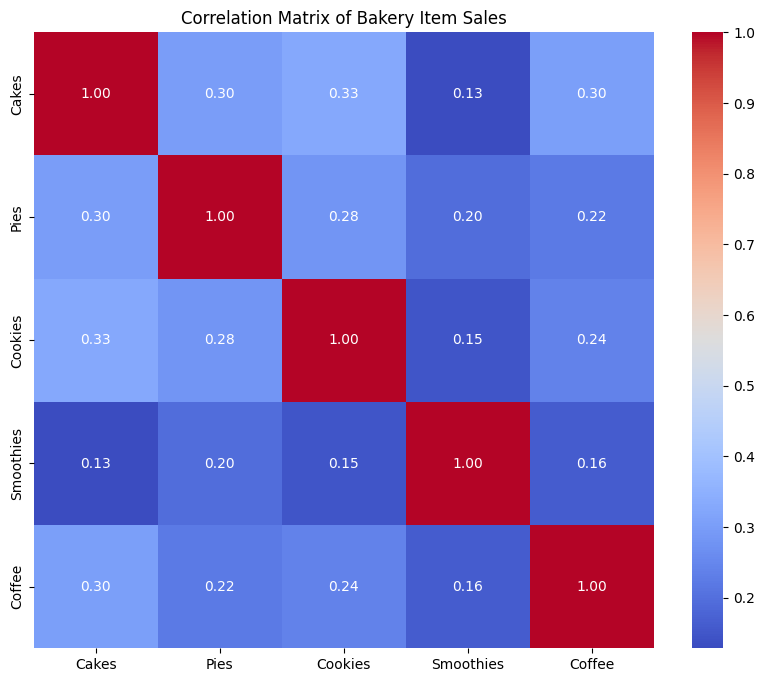

In [ ]:
# prompt: correlation map between Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee

# Assuming 'b' DataFrame is already loaded and processed as in your provided code

correlation_matrix = b[['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bakery Item Sales')
plt.show()

Correlation matrix during promotions:
              Cakes      Pies   Cookies  Smoothies    Coffee
Cakes      1.000000  0.219942  0.230315   0.039217  0.249894
Pies       0.219942  1.000000  0.093379   0.149596  0.197354
Cookies    0.230315  0.093379  1.000000   0.079481  0.095480
Smoothies  0.039217  0.149596  0.079481   1.000000  0.078542
Coffee     0.249894  0.197354  0.095480   0.078542  1.000000


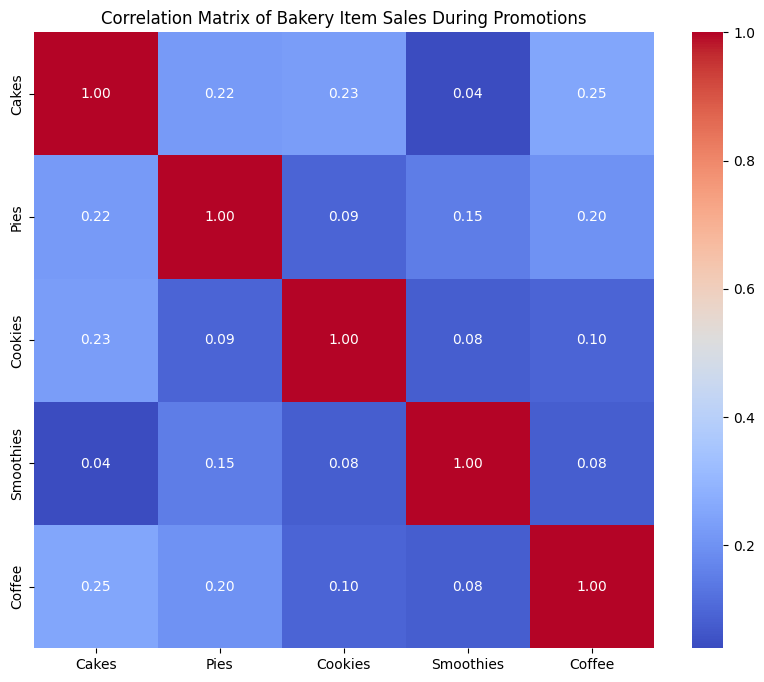

In [ ]:
# prompt: calculate correlation coefficient for the combination of products during promotion

# Calculate the correlation matrix for all product combinations during promotions
promotion_data = b[b['promotion'] == 'promotion']
correlation_matrix_promotion = promotion_data[['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee']].corr()

# Display the correlation matrix
print("Correlation matrix during promotions:")
print(correlation_matrix_promotion)

# Plotting the correlation heatmap for promotions only
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_promotion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bakery Item Sales During Promotions')
plt.show()

In [ ]:
# Impact of promotions seems to be  varying after pre processing the outliers
# the days is which the promotion is effective and ineffective got changes
# So outliers should be treated with care before jumping into insights


In [ ]:
#There is no significant sign of cannibalization(negative correlation) between items during promotions
#There only exists weak positive correlation or no correlation between the items


In [ ]:
#Insight 1
# Cookies have the highest average sales among all items, both on weekdays and weekends.
# The sales gap between weekdays and weekends for cookies is substantial, indicating they are a popular weekend item.
#Actions
# Pairing two high-performing weekend items like Coffee with Cookies to encourage customers to purchase more
# Discounts, combo deals, or loyalty offers can be provided for frequent customers of cookies


In [ ]:
#Insight 2
# Smoothies experience peak sales around the middle of the year (May–August).
# Cakes and cookies experince peak sales during the end of the year(october-december) owing to the holiday season
#Actions
# Summer months can be leveraged (May–August) to run promotional campaigns or  limited-time flavors can be introduced to maximize sales during the high-demand period.
# Holiday or festive season marketing could increase sales. Highlight gifting options or bundle both cookies and cakes with holiday packs.

In [ ]:
# Insight 3
# Combo offers can be implemented based on the relationship between the various bakery items
#Actions
# A strong pairing for customers who enjoy dessert with their coffee. Offers like "Coffee Break with Cake" can attract customers for morning or evening snacks.
# Smoothies have the weakest correlations with all items .They may not align well with the other items for combos.
# A combo like "Cake & Cookie Delight" can be marketed for parties or celebrations.

In [ ]:
#Insight 4
# Promotional activities are more effective on the sales of cookies
# The effectiveness of the promotions varies for each items and on different days
# Promotional activities should be continued the same on the days when they are effective
# During the ineffective days, strategies should be implemented to improve the effectiveness

In [ ]:
# Insight 5
# Smoothies doesn't have a good relationship with any of the bakery items(weak correlation value)
#Action
# A new item can be added that complements the smoothies(mainly) and other products which could drive the sales of smoothies.
# Salads, particularly those with fresh greens or fruits, make smoothies part of a balanced meal, catering to health-conscious diner.